### June COVID19 Projections

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [2]:
#load in the dataset
Nigeria = pd.read_csv('......./Nigeria Excel.csv')

In [3]:
print (Nigeria.head())

        date  total_cases  new_cases  total_deaths  new_deaths
0  2/27/2020            1          1           0.0         0.0
1  2/28/2020            1          0           0.0         0.0
2  2/29/2020            1          0           0.0         0.0
3   3/1/2020            1          0           0.0         0.0
4   3/2/2020            2          1           0.0         0.0


In [4]:
#include only the 'Total Case' column
Nigeria.drop(columns = ['new_cases', 'total_deaths', 'new_deaths'], inplace=True)

In [5]:
Nigeria

,date,total_cases
0,2/27/2020,1
1,2/28/2020,1
2,2/29/2020,1
3,3/1/2020,1
4,3/2/2020,2
...,...,...
79,5/27/2020,8733
80,5/28/2020,8915
81,5/29/2020,9302
82,5/30/2020,9855


In [6]:
from datetime import datetime
Nigeria['date'] = pd.to_datetime(Nigeria['date'])

In [7]:
Nigeria.set_index('date', inplace=True)

In [8]:
Nigeria.index

DatetimeIndex(['2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-10', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
      

In [9]:
#convert to timeseries

ts = Nigeria['total_cases']
ts.head()

date
2020-02-27    1
2020-02-28    1
2020-02-29    1
2020-03-01    1
2020-03-02    2
Name: total_cases, dtype: int64

In [10]:
ts['2020-02-27' : '2020-03-31']

date
2020-02-27      1
2020-02-28      1
2020-02-29      1
2020-03-01      1
2020-03-02      2
2020-03-10      2
2020-03-15      2
2020-03-16      2
2020-03-17      3
2020-03-18      8
2020-03-19      8
2020-03-20     12
2020-03-21     22
2020-03-22     30
2020-03-23     40
2020-03-24     44
2020-03-25     51
2020-03-26     65
2020-03-27     81
2020-03-28     97
2020-03-29     97
2020-03-30    131
2020-03-31    131
Name: total_cases, dtype: int64

In [11]:
#total reported cases as at end of May
ts.max()

10162

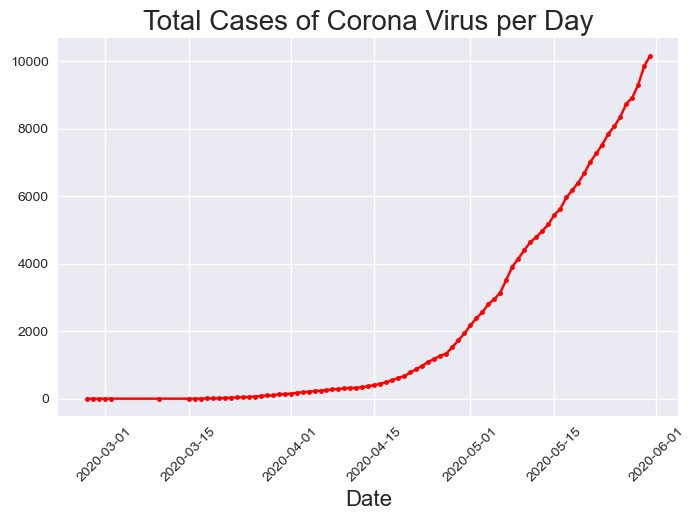

In [12]:
plt.figure(figsize = (8,5), dpi=100)

plt.plot(ts, 'r.-')

plt.title('Total Cases of Corona Virus per Day', fontdict= {'fontsize':20})

plt.xticks(rotation=45)

plt.xlabel('Date', fontdict= {'fontsize':16})
plt.show()

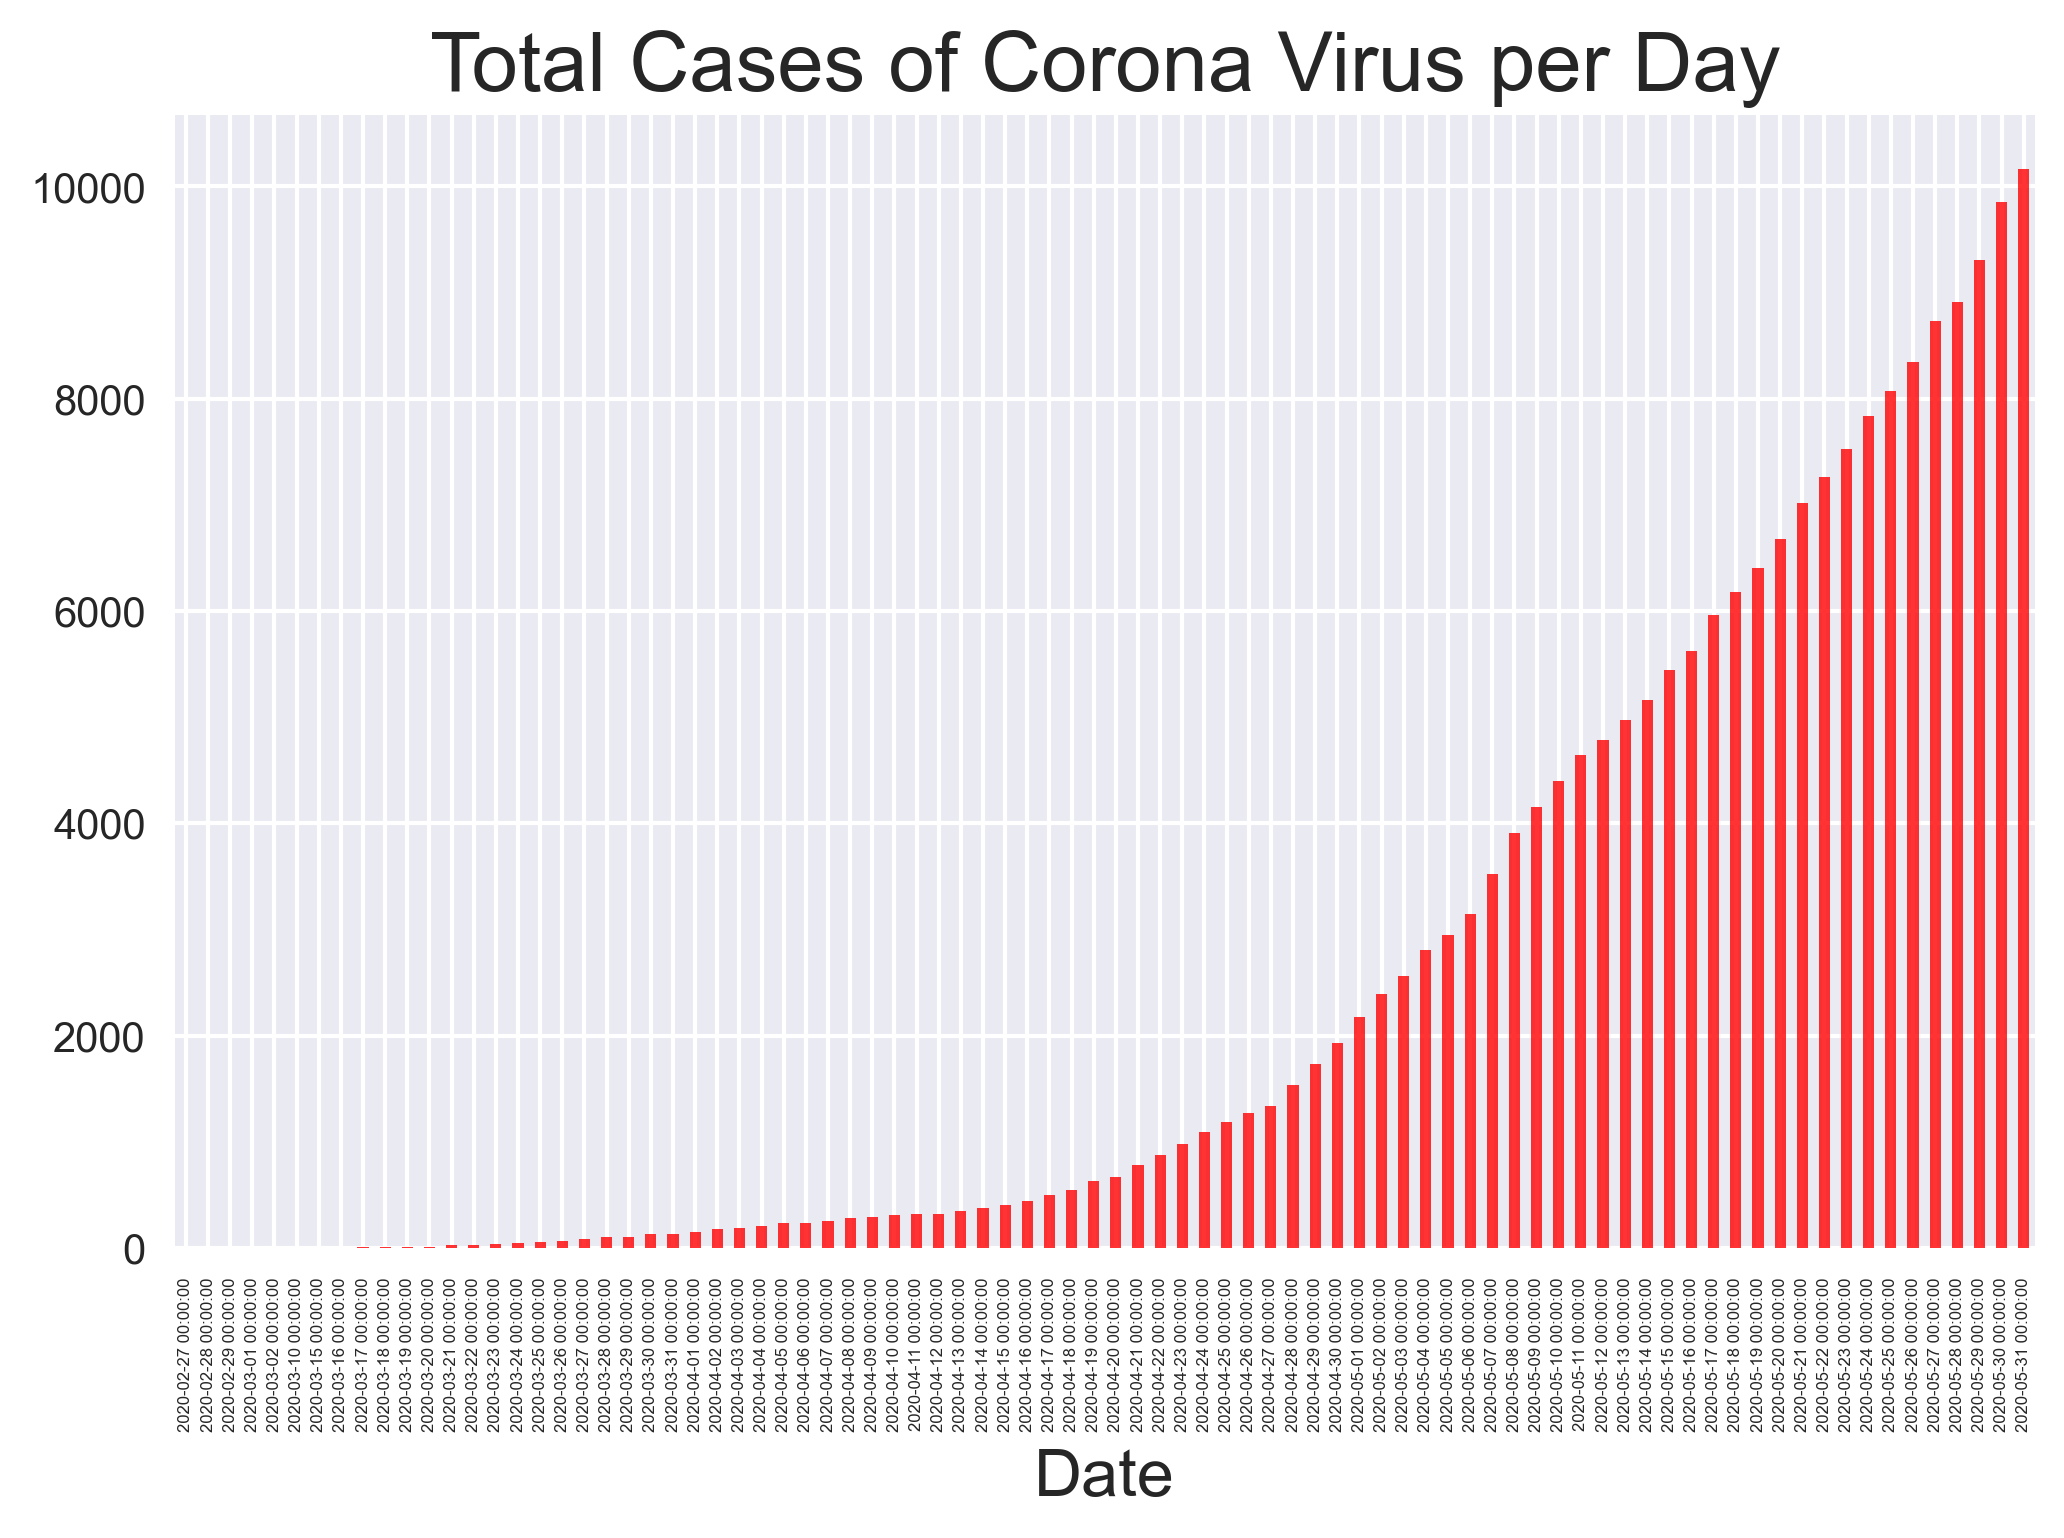

In [13]:
plt.figure(figsize = (8,5), dpi=300)

ts.plot(kind='bar', color='red', alpha=0.8)

plt.title('Total Cases of Corona Virus per Day', fontdict= {'fontsize':20})

plt.xticks(rotation=90, size=4)

plt.xlabel('Date', fontdict= {'fontsize':16})

plt.show()

In [14]:
#Perform Dickey Fuller Tes
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determining the rolling statistics
    rolmean=timeseries.rolling(window=10).mean()
    rolstd=timeseries.rolling(window=10).std()
    
  #Plot rolling statistics:
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    
    #Perform Dickey-fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)
                                    

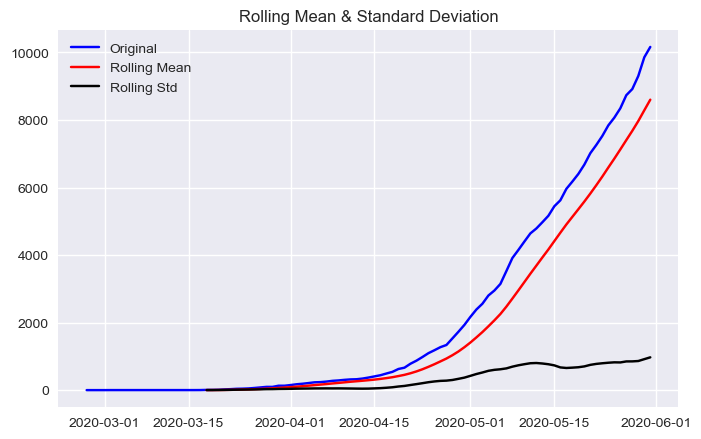

Results of Dickey-Fuller Test:
Test Statistic                  1.386854
p-value                         0.997054
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [15]:
plt.figure(figsize = (8,5), dpi=100)

test_stationarity(ts)

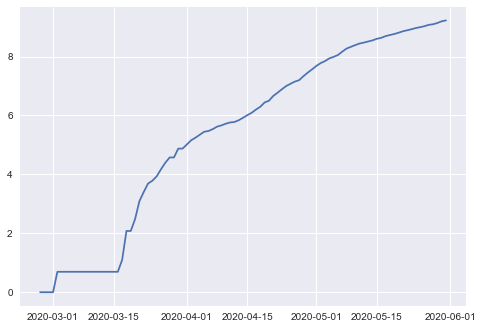

In [16]:
#use new logscale
ts_log = np.log(ts)

plt.plot(ts_log)

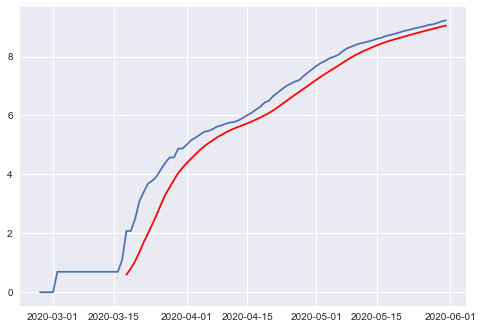

In [17]:
moving_avg = ts_log.rolling(window=10).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [18]:
#estimate the moving average difference
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff

date
2020-02-27         NaN
2020-02-28         NaN
2020-02-29         NaN
2020-03-01         NaN
2020-03-02         NaN
                ...   
2020-05-27    0.171071
2020-05-28    0.154975
2020-05-29    0.160092
2020-05-30    0.178910
2020-05-31    0.172540
Name: total_cases, Length: 84, dtype: float64

In [19]:
#estimate the trend
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2020-03-18    1.484377
2020-03-19    1.276433
2020-03-20    1.433408
2020-03-21    1.730439
2020-03-22    1.700474
Name: total_cases, dtype: float64

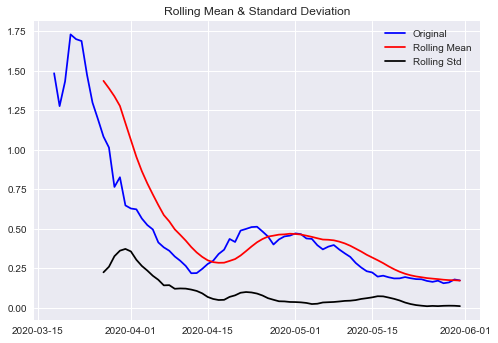

Results of Dickey-Fuller Test:
Test Statistic                 -2.275105
p-value                         0.180123
#Lags Used                      8.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [20]:
test_stationarity(ts_log_moving_avg_diff)

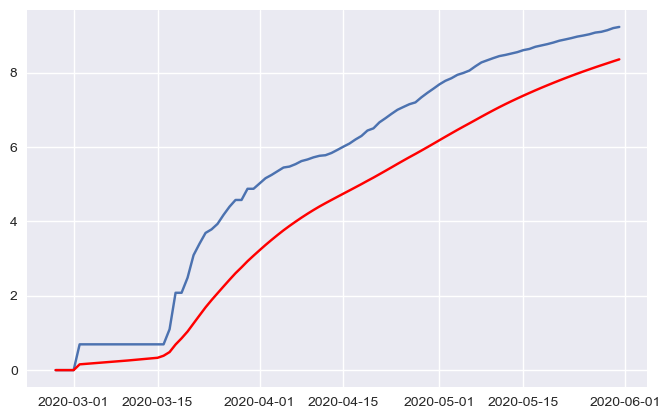

In [21]:
plt.figure(figsize = (8,5), dpi=100)

expweighted_avg = ts_log.ewm(halflife = 12, min_periods = 0, adjust=True).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

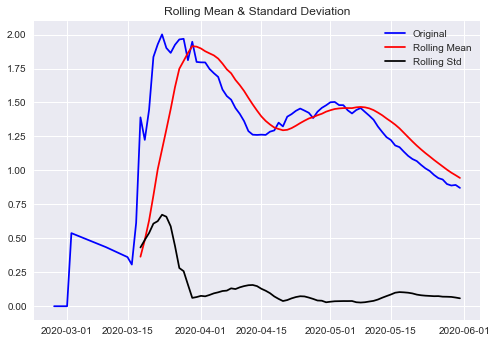

Results of Dickey-Fuller Test:
Test Statistic                 -1.134239
p-value                         0.701227
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [22]:
ts_log_exp_diff = ts_log-expweighted_avg
test_stationarity(ts_log_exp_diff)

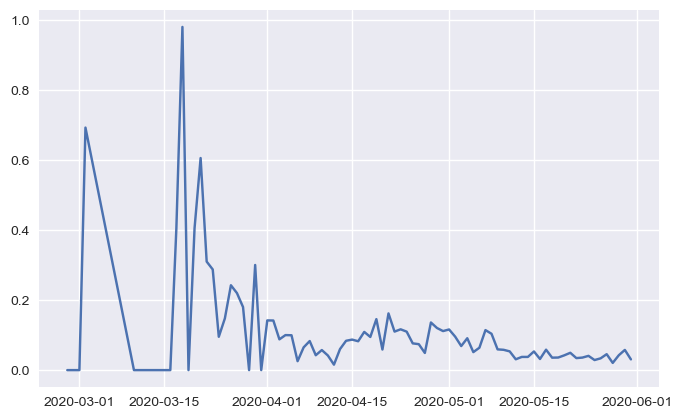

In [23]:
# Checking for Seasonality
#    first by differencing
plt.figure(figsize = (8,5), dpi=100)

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

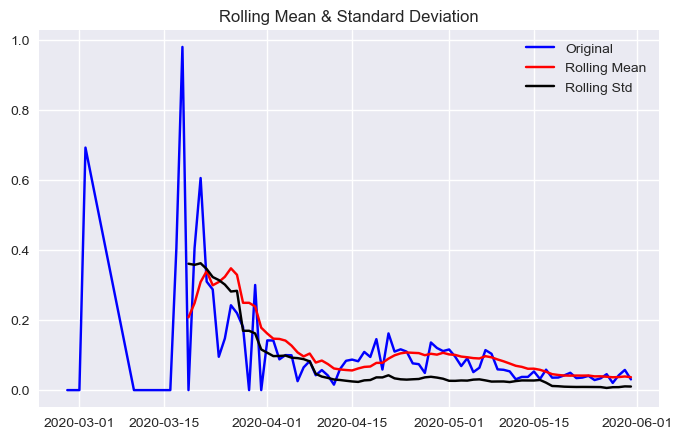

Results of Dickey-Fuller Test:
Test Statistic                -5.892676e+00
p-value                        2.899621e-07
#Lags Used                     1.100000e+01
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


In [24]:
plt.figure(figsize = (8,5), dpi=100)

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

c:\users\co\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


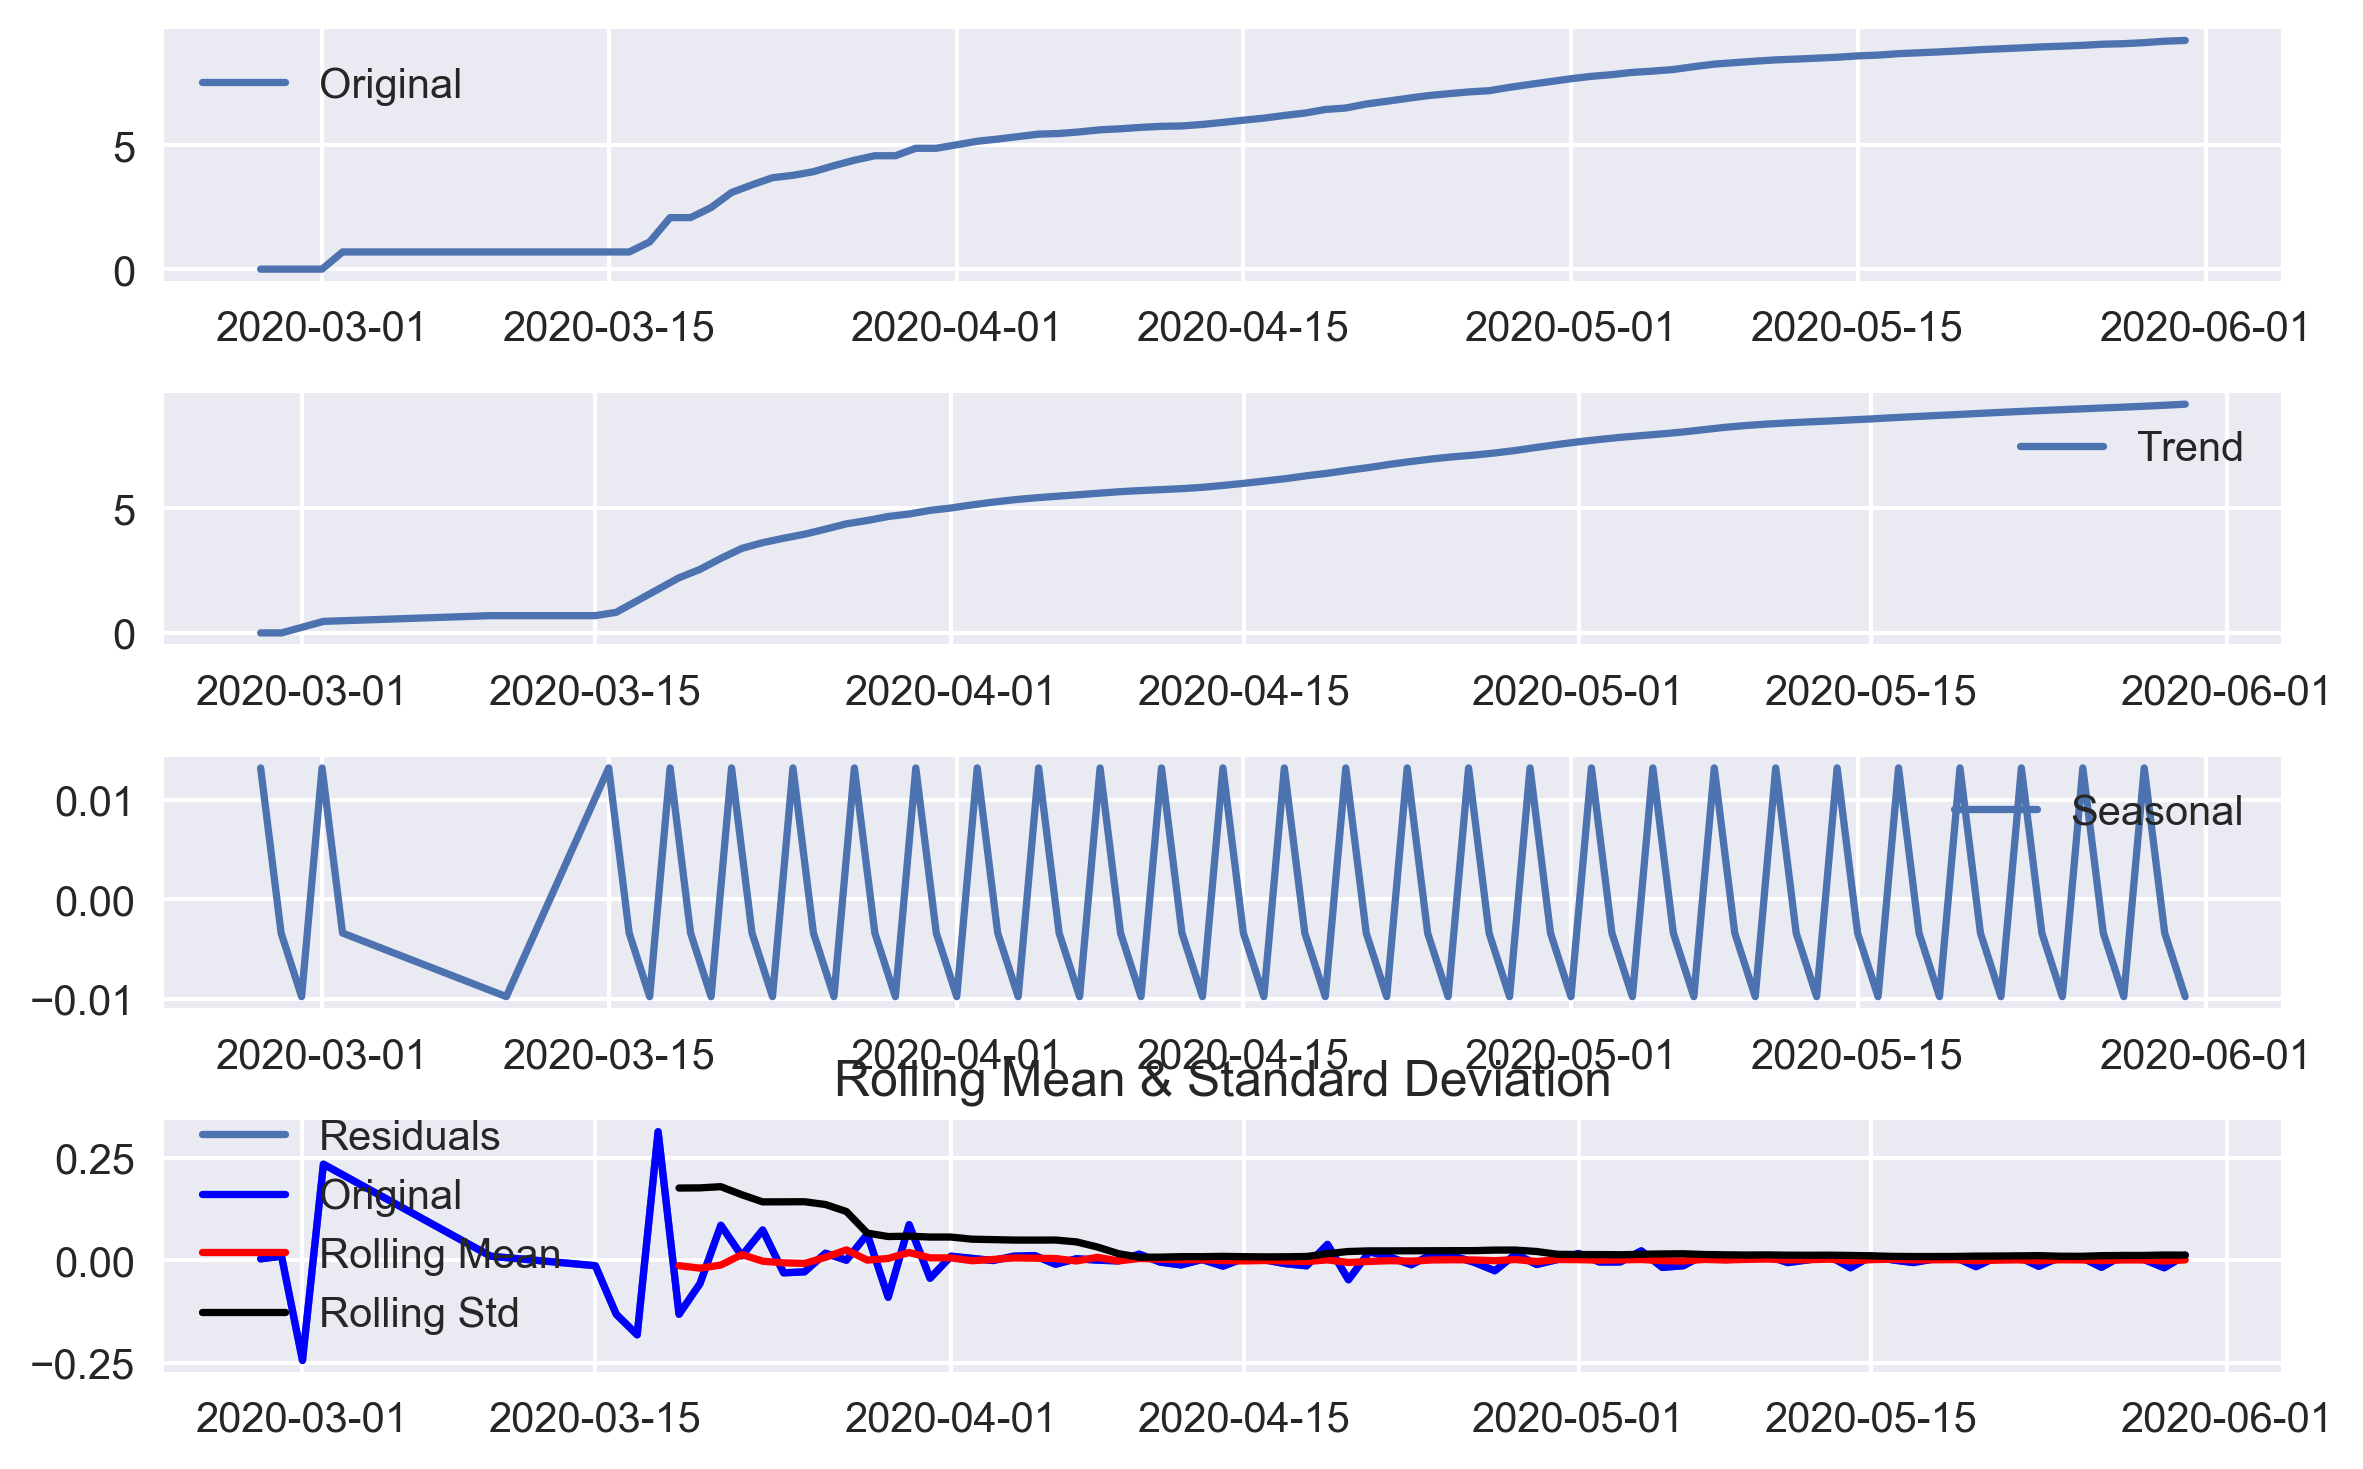

Results of Dickey-Fuller Test:
Test Statistic                 -3.701224
p-value                         0.004096
#Lags Used                     10.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [25]:
plt.figure(figsize = (8,5), dpi=300)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


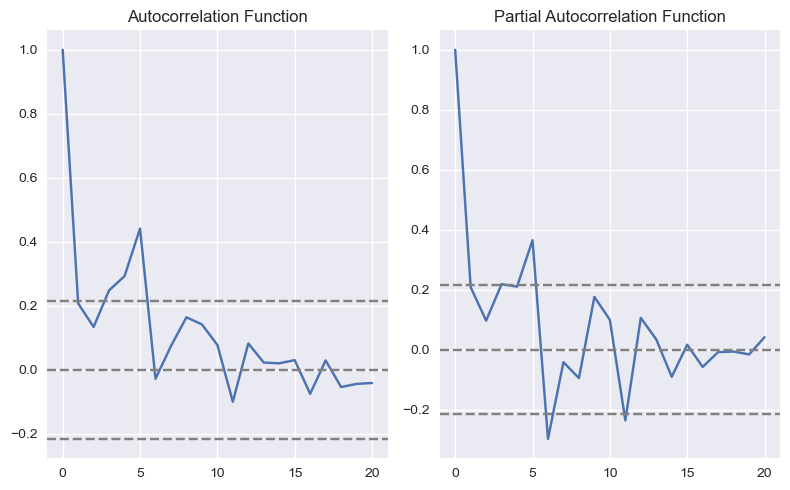

In [26]:
#plot the autocorrelation function
plt.figure(figsize = (8,5), dpi=100)

from statsmodels.tsa.stattools import acf, pacf


lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### Predict with ARIMA model

c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plotting AR model


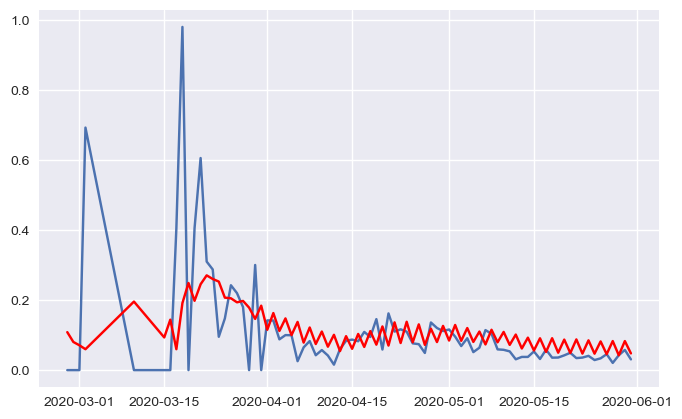

In [27]:

plt.figure(figsize = (8,5), dpi=100)

from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(ts_log, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title=('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
print('Plotting AR model')

c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


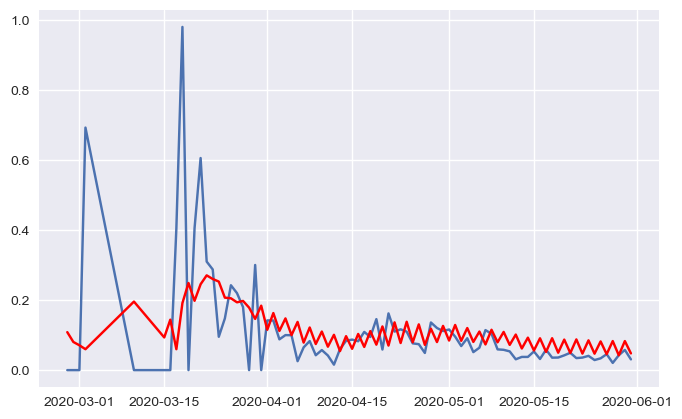

In [28]:
plt.figure(figsize = (8,5), dpi=100)

from statsmodels.tsa.arima_model import ARIMA

#MA MODEL
model = ARIMA(ts_log, order=(2,1,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title=('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
print('Plotting AR model')

c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


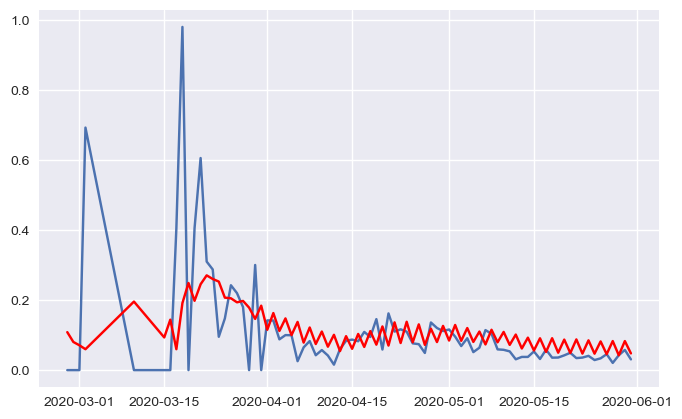

In [29]:
plt.figure(figsize = (8,5), dpi=100)

from statsmodels.tsa.arima_model import ARIMA

#MA MODEL
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title=('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
print('Plotting AR model')

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2020-02-28    0.108525
2020-02-29    0.080467
2020-03-01    0.070975
2020-03-02    0.059732
2020-03-10    0.195863
dtype: float64


In [31]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2020-02-28    0.108525
2020-02-29    0.188992
2020-03-01    0.259967
2020-03-02    0.319699
2020-03-10    0.515562
dtype: float64


In [32]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()


date
2020-02-27    0.000000
2020-02-28    0.108525
2020-02-29    0.188992
2020-03-01    0.259967
2020-03-02    0.319699
dtype: float64

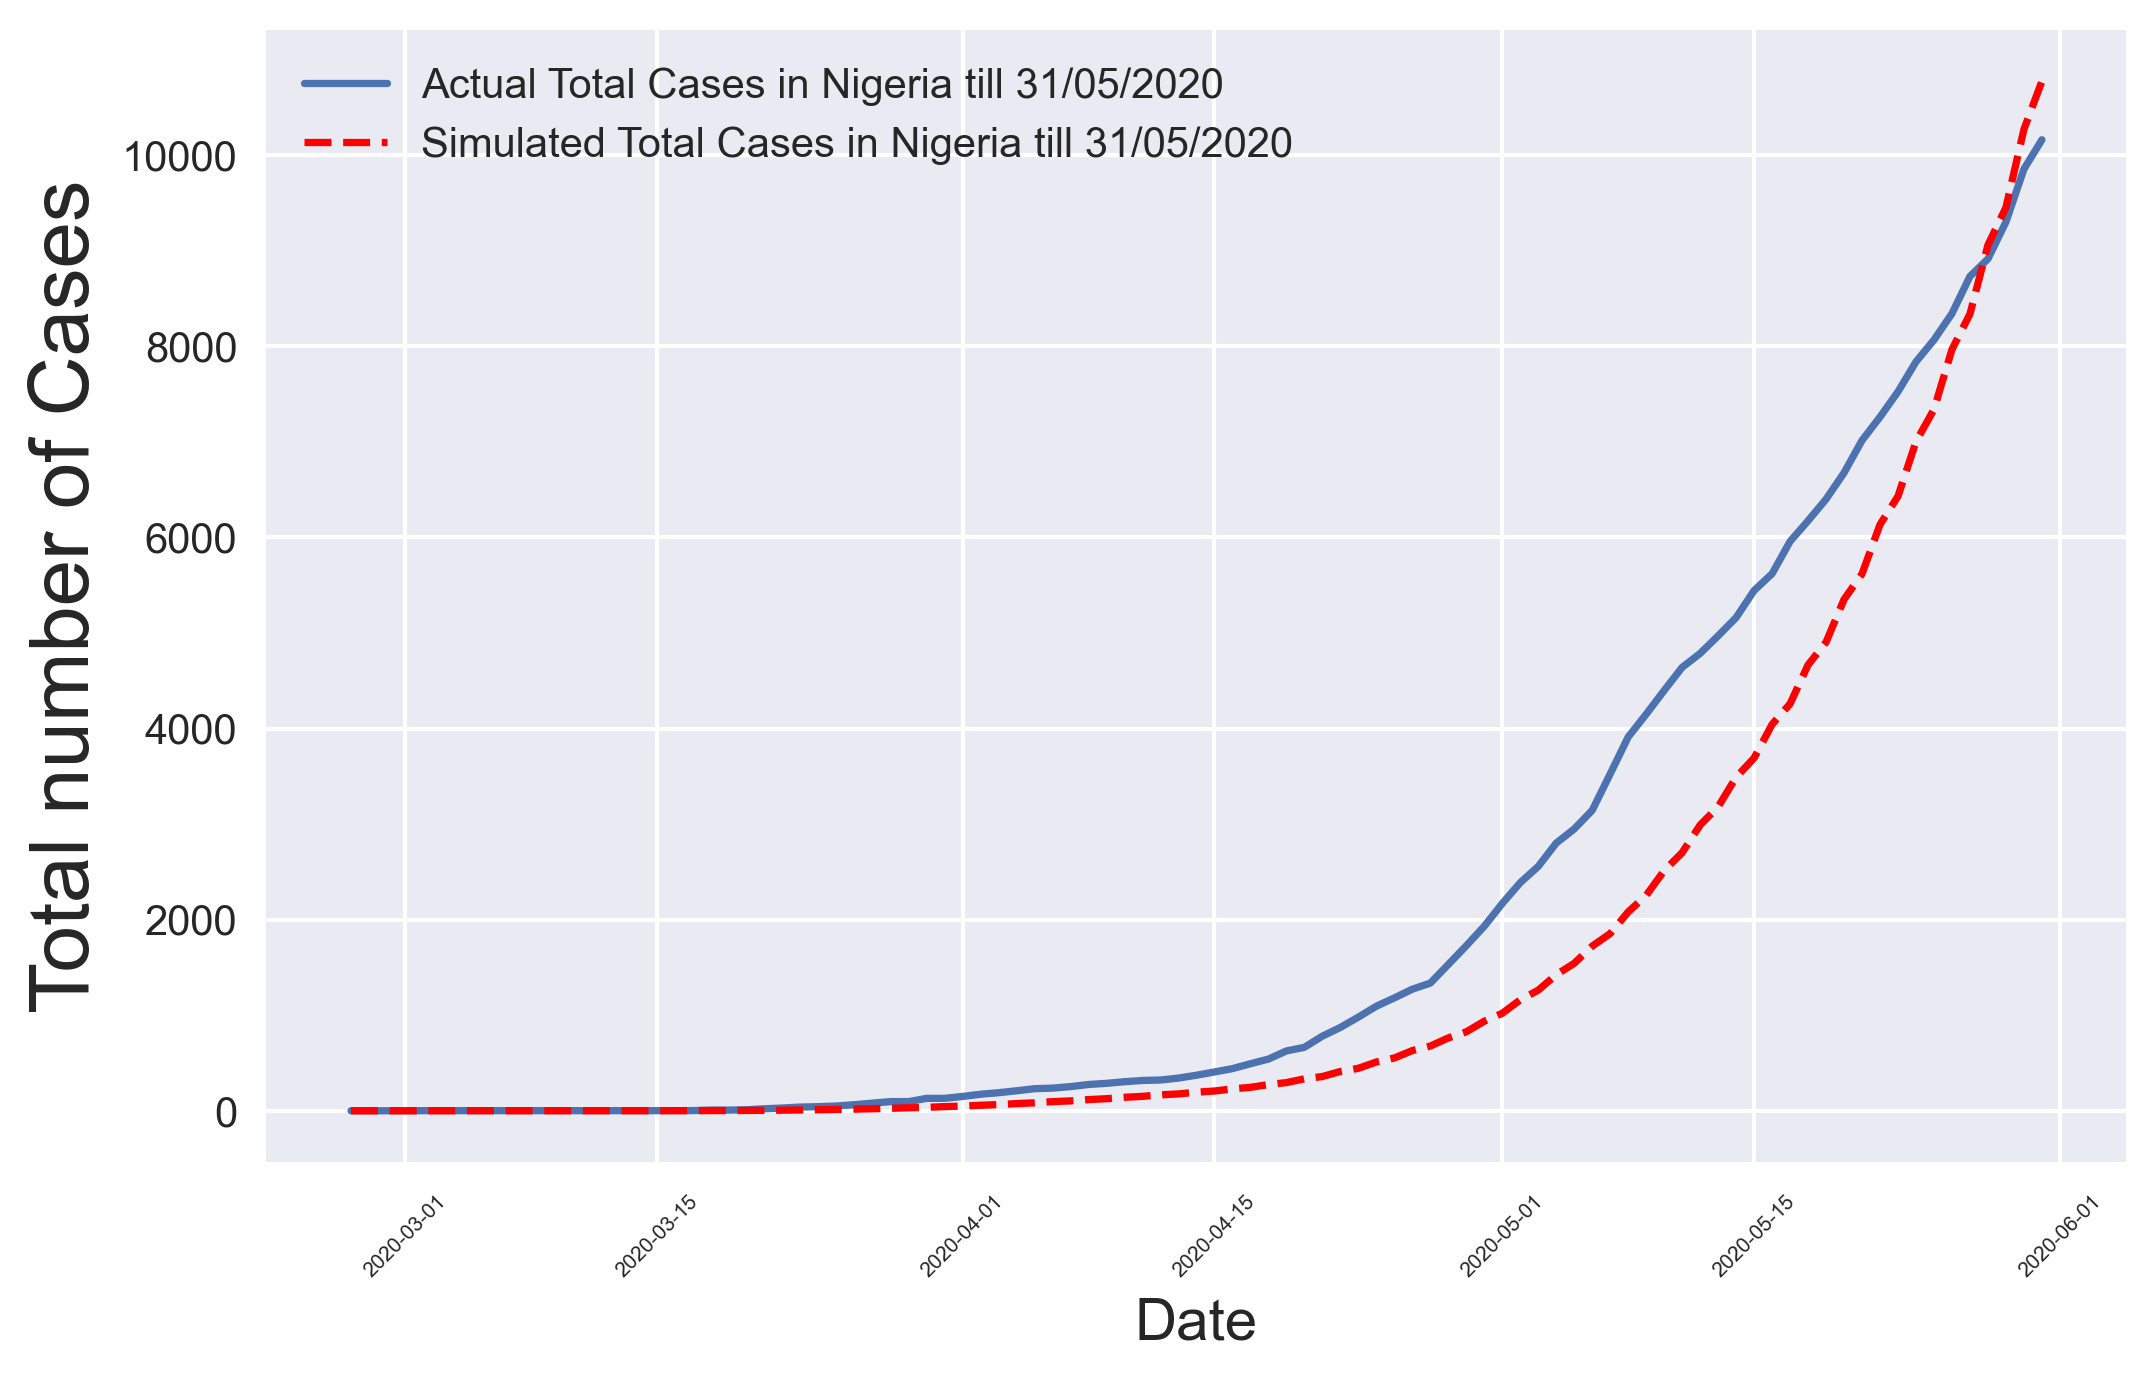

In [33]:
#plot the original vs simulated case

plt.figure(figsize = (8,5), dpi=300)

predictions_ARIMA = np.exp(predictions_ARIMA_log)


plt.plot(ts, label='Actual Total Cases in Nigeria till 31/05/2020')
plt.plot(predictions_ARIMA, label = 'Simulated Total Cases in Nigeria till 31/05/2020 ', linestyle= '--', color='red')
plt.legend(loc='best')
plt.xticks(rotation=45, size=5)


plt.xlabel('Date', size=14)
plt.ylabel('Total number of Cases', size=20)



plt.savefig('Original_Simulated cases.png', dpi=300)

plt.show()

In [34]:
ts_log.to_frame()

,total_cases
date,
2020-02-27,0.000000
2020-02-28,0.000000
2020-02-29,0.000000
2020-03-01,0.000000
2020-03-02,0.693147
...,...
2020-05-27,9.074864
2020-05-28,9.095491
2020-05-29,9.137985


c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\users\co\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<Figure size 1500x900 with 0 Axes>

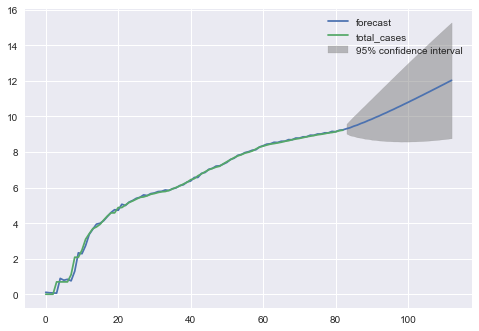

In [35]:
plt.figure(figsize = (5,3), dpi=300)

results_ARIMA.plot_predict(1,113)

plt.savefig('Forecast cases.png', dpi=300)

In [36]:
#Forecast for the next 30 days
x = results_ARIMA.forecast(steps=30)

In [37]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.30819,9.36484,9.45093,9.51601,9.60571,9.67784,9.77058,9.84862,9.9439,10.0269,...,11.0983,11.198,11.3027,11.4038,11.5091,11.6115,11.7173,11.8206,11.9268,12.031
1,0.140121,0.221336,0.285062,0.351576,0.410939,0.473213,0.530824,0.590569,0.646793,0.704447,...,1.27009,1.31682,1.36231,1.40745,1.45148,1.4951,1.53772,1.5799,1.62118,1.662
2,"[9.03355958872442, 9.582823889648848]","[8.931031941917755, 9.798654905098548]","[8.892220564074606, 10.009643423702542]","[8.826931704825942, 10.205085749777766]","[8.800284651626415, 10.411137317067636]","[8.750364351198009, 10.605324387350354]","[8.73018289655641, 10.81097375259592]","[8.691128830090038, 11.006115616305161]","[8.676208406308326, 11.211590812848797]","[8.646203504926133, 11.407584580927429]",...,"[8.609011189462194, 13.58766195439436]","[8.617133298943074, 13.778958670315191]","[8.632609198885577, 13.9727840619303]","[8.645288524224803, 14.162386944720577]","[8.664268060073393, 14.353956857892168]","[8.681118108021552, 14.541787347762183]","[8.703381706304512, 14.731120303708934]","[8.72405201852898, 14.917139338507528]","[8.74938806807237, 15.104278278619837]","[8.77356130583165, 15.288476941138965]"


In [38]:
#Taking the minmimum and maximum prediction
x[0]

array([ 9.30819174,  9.36484342,  9.45093199,  9.51600873,  9.60571098,
        9.67784437,  9.77057832,  9.84862222,  9.94389961, 10.02689404,
       10.12430522, 10.21144613, 10.31064744, 10.40126137, 10.50196448,
       10.59548735, 10.69745037, 10.79340972, 10.89642973, 10.99442983,
       11.09833657, 11.19804598, 11.30269663, 11.40383773, 11.50911246,
       11.61145273, 11.71725101, 11.82059568, 11.92683317, 12.03101912])

In [39]:
#convert back to real numbers
x = np.exp(x[0])

In [40]:
#convert to integers
x=x.astype(int)

In [41]:
final_prediction = pd.DataFrame(x)

In [42]:
final_prediction

,0
0,11027
1,11670
2,12720
3,13575
4,14849
5,15960
6,17510
7,18932
8,20824
9,22626


In [43]:
final_prediction.rename(columns={0:'Predicted Value'}, inplace=True)

In [44]:
final_prediction.to_csv('Nigeria Forcast.csv', index=False)